In [56]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [57]:
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [58]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [59]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
df_2016 = df_2016.set_index('Created_Date')

In [60]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [61]:
train_years = pd.concat([df_2014, df_2015])

In [62]:
df_weather = pd.get_dummies(train_years['Weather'])

In [63]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [64]:
train_years.drop('Weather', axis=1, inplace=True)

In [65]:
complaint_type = ['Building_Conditions', 
                 'General_Request', 'Parking_Enforcement', 
                 'Signal_Sign_Repair', 'Street_Sidewalk_Repair']

weather_types = ['Living_Conditions', 'Max_TempF', 'Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
                 'Fog-Rain-Thunderstorm', 'Fog-Snow',
                 'Rain', 'Rain-Snow',
                 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                 'Snow', 'Sunny']

feature_cols = ['Building_Conditions', 
                'General_Request', 'Parking_Enforcement', 
                'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
                'Max_TempF', 'day',
                'Fog', 'Fog-Rain',
                'Fog-Rain-Snow', 
                'Fog-Rain-Thunderstorm', 'Fog-Snow',
                'Rain', 'Rain-Snow',
                'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                'Snow', 'Sunny']

X = train_years[weather_types]
y = train_years['Living_Conditions']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [67]:
y_test_2016 = df_2016.Max_TempF

In [68]:
clf = LogisticRegression()

In [69]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
clf.predict(X)

array([  218.,   381.,   616.,   218.,   449.,   714.,   653.,   633.,
         633.,   593.,   449.,   406.,   406.,   692.,   593.,   593.,
         406.,   449.,   406.,   381.,   381.,   606.,   633.,   633.,
         616.,   381.,   406.,   606.,   606.,   633.,   406.,   406.,
         381.,   491.,   633.,   593.,   406.,   406.,   406.,   616.,
         406.,   633.,   633.,   714.,   593.,   285.,   218.,   406.,
         381.,   692.,   692.,   692.,   406.,   406.,   692.,   741.,
         606.,   598.,   633.,   406.,   593.,   598.,   633.,   741.,
         633.,   692.,   406.,   435.,   593.,   741.,   692.,   741.,
         741.,   435.,   406.,   606.,   741.,   714.,   714.,   741.,
         406.,   406.,   741.,   606.,   606.,   741.,   692.,   692.,
         756.,   593.,   741.,   714.,   692.,   692.,   435.,   406.,
         714.,   741.,   741.,   741.,   692.,   424.,   406.,   673.,
         714.,   593.,   741.,   741.,   424.,   406.,   741.,   692.,
      

In [71]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [72]:
df_pred.sort_index(axis=0, inplace=True)

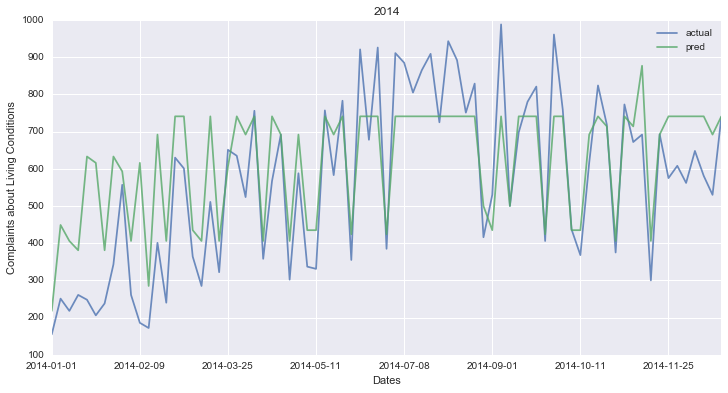

In [73]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014')
plt.xlabel('Dates')
plt.ylabel('Complaints about Living Conditions')

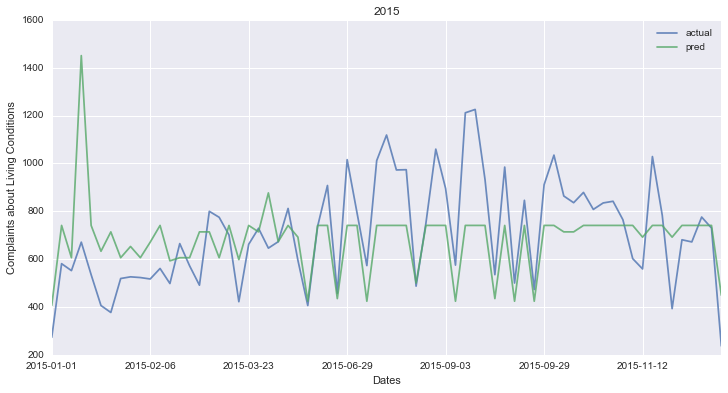

In [74]:
df_pred[pd.to_datetime(df_pred.index).year==2015].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2015')
plt.xlabel('Dates')
plt.ylabel('Complaints about Living Conditions')